<a href="https://colab.research.google.com/github/AkJadoon19/Assign2/blob/main/lab2_2017023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 Exploratory Data Analysis

For this lab, we'll explore some data from a very useful source, the UC Irvine machine learning data repository.

First, create a directory ~/labs/lab2 on your VM/Linux OS. 

Open a browser and point it at this ipynb file. Click on the download link (top right hand corner of the page) and download this file into your lab2 directory.

Now from inside (or outside) your VM open a browser and go to this URL (this may be a good time to enable clipboard sharing on your VM. Its under the "Devices" menu):
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
and read the dataset description. 

Click on the "Data Folder" link near the top of the page. If you're not inside your VM, copy the URL for this page and then paste it into a browser on your VM. 

Now click on "processed.cleveland.data" and save it into ~/labs/lab2. 

Now read the data into a python and create a variable "cleveland_raw_data" which is a list of rows from this dataset. Each row should be a list of string values returned by the csv file reader.

In [3]:

import csv
with open('processed.cleveland.data') as csvfile:
    cleveland_raw_data = list(csv.reader(csvfile))    
        

> TODO: How many rows are there in the dataset?

Ans 303

---



In [4]:
len(cleveland_raw_data)

303

In [5]:
len(cleveland_raw_data[2])

14

## Data Cleaning

First we have to clean and sanitize the data. This data is pretty clean and is mostly numeric but contains some '?' in some fields.  To make it easier to handle, we convert those fields to 'None'. For convenience, you should define a function "safefloat" that takes a string argument, and returns None if the argument is '?', otherwise the float value of the string. 

In [8]:
import string 

def safefloat(x):       # TODO: Implement safefloat()
    if x=="?":
      return None
    else:
      return float(x)
    
cleveland_data = [[safefloat(x) for x in y] for y in cleveland_raw_data]

As discussed in the dataset summary, the following are the column names. 

In [11]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Now we construct a dictionary mapping these header names to the column numbers 0...13:

In [12]:
headernum = dict(zip(headers, range(len(headers))))    

In [13]:
headernum

{'age': 0,
 'ca': 11,
 'chol': 4,
 'cp': 2,
 'exang': 8,
 'fbs': 5,
 'num': 13,
 'oldpeak': 9,
 'restecg': 6,
 'sex': 1,
 'slope': 10,
 'thal': 12,
 'thalach': 7,
 'trestbps': 3}

Define a function "getcol" that takes a column name and returns the data in that column as a list of numbers.

In [14]:
def getcol(name): # TODO write getcol
    return [x[headernum[name]] for x in cleveland_data]


## Basic Statistics

What is the minimum, maximum, mean and standard deviation of the age of this set of subjects? Use the numpy package with contains the mean() and std() functions. 

In [15]:
import numpy as np
age = getcol('age')
[min(age), max(age), np.mean(age), np.std(age)]

[29.0, 77.0, 54.43894389438944, 9.02373483119838]

Next we define a function select which given a column name and a predicate, returns the values of that column at rows for which the predicate is true.

In [16]:
def select(colname, predicate):
    icol = headernum[colname]
    return [i[icol] for i in cleveland_data if predicate(i)]

Now run these expressions to get the mean age of male and female subjects.

In [18]:
def fieldis(colname, cval):
    icol = headernum[colname]
    return lambda x: x[icol] == cval

[np.mean(select('age', fieldis('sex',1))), np.mean(select('age', fieldis('sex',0)))]

[53.83495145631068, 55.72164948453608]

> TODO: What were the mean ages for females and males?

53.83495145631068, 55.72164948453608

## Histograms of Data Fields

Plot histograms of age and resting blood pressure

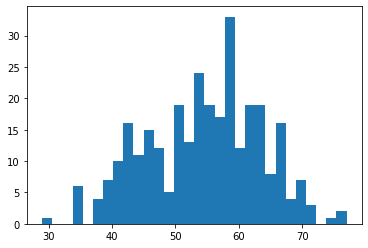

In [19]:
import pylab
%matplotlib inline

h1 = pylab.hist(age, 30)

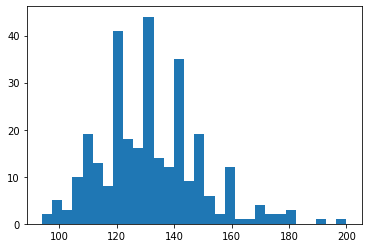

In [20]:
bp = getcol('trestbps')
h2 = pylab.hist(bp, 30)

> TODO
Describe the rough shape of the distribution of bps.
Is it skewed? 

Its is roughly shaped because distribution is described by number of peaks and its symmetry .Yes it is skewed distribution (first one is positive skewed distribution and seond one is negatively skewed distribution).

## Scatter Plots

Make scatter plots of:
*    age vs bp (resting blood pressure) 
*    age vs thalach (max heart rate)
    

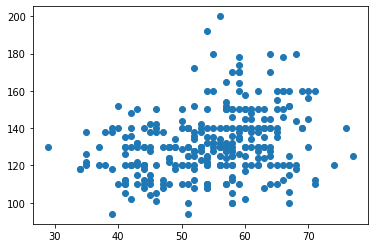

In [21]:
pylab.scatter(age, bp)

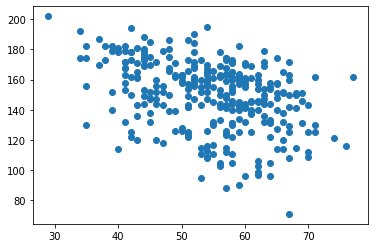

In [22]:
maxhr = getcol('thalach')
pylab.scatter(age, maxhr)

We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the 'num' field to color the dots. num is an integer indicating the degree of heart disease from 0...4. We also make the dots larger with the s= argument to make the colors easier to see. 

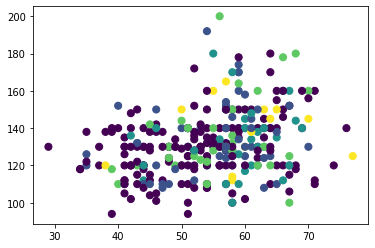

In [23]:
pylab.scatter(age, bp, c=getcol('num'), s=50)

To figure out what color encodes what value, we can do a simple plot of the values 0...4

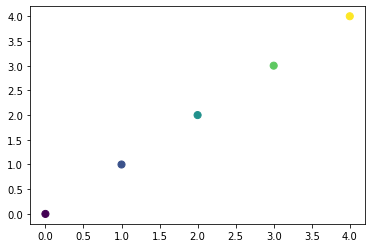

In [24]:
pylab.scatter(range(5), range(5), c=range(5), s=50)

> TODO: What do you notice about the distribution of num = 2 diagnoses?

It means people with medium age (num =2 (green dot)) will have medium number of heart diseases as seen from the graph

These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data. 

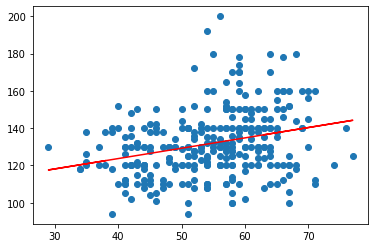

In [25]:
# for numpy we need arrays instead of lists of values
age = np.array(getcol('age'))
bp = np.array(getcol('trestbps'))

pylab.scatter(age, bp)
m, b = np.polyfit(age, bp, 1)
pylab.plot(age, m*age + b, '-', color='red')

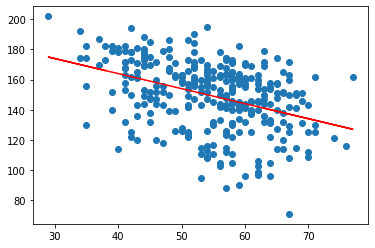

In [26]:
maxhr = np.array(getcol('thalach'))

pylab.scatter(age, maxhr)
m, b = np.polyfit(age, maxhr, 1)
pylab.plot(age, m*age + b, '-', color='red')

## Critical Thinking with Data

The following scatter plot and regression line shows the relationship between blood pressure (X-axis) and heart disease (Y-axis). 

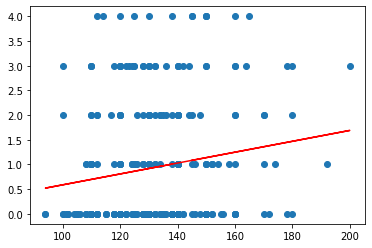

In [27]:
num = np.array(getcol('num'))
factor = bp

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

> TODO: Based on this plot, do you think blood pressure influences heart disease?

Yes, bp influenes heart diseases because There is a positive corelation between bp and heart diseases as shown in the graph. 

Now consider this plot of age versus num:

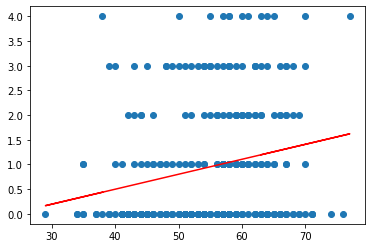

In [28]:
num = np.array(getcol('num'))
factor = age

pylab.scatter(factor, num)
m, b = np.polyfit(factor, num, 1)
pylab.plot(factor, m*factor + b, '-', color='red')

> TODO: Based on this plot of Age vs Num and the previous plot of Age vs BPS, what would you say now about the relation between BPS and Num?

Yes there is a relation between BPS and num. The realtion is positive corelation

## Dimension Reduction

Recall that dimension reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [30]:
from sklearn.decomposition import PCA
cleveland_matrix = np.array(cleveland_data, dtype=np.float64) # First put the data in a 2D array of double-precision floats
pca=PCA(n_components=2)
results = pca.fit(cleveland_matrix[:,0:8])                      # leave out columns with None in them
yy = pca.transform(cleveland_matrix[:,0:8])                                              # returns the projections of the data into the principal component directions

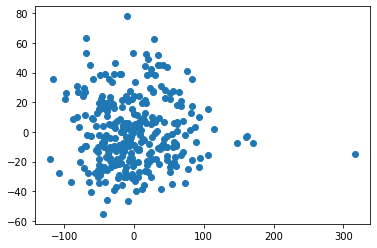

In [31]:
pylab.scatter(yy[:,0],yy[:,1])

> TODO: Do you see a relationship between the two main variables (X and Y axes of this plot)?

There is a positive corelation between X and Y values. As X value increases Y also increases

## Text Data

Download the NY times Dataset from here
https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/docword.nips.txt.gz
and save it to your lab2 directory. Unzip the file, producing docword.nips.txt.

This file has 3 header lines: num docs, num distinct words, num total words. The following lines represent the documents with three fields:

docid wordid wordcount

We can read the file with a csv reader:

In [33]:
with open("docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))
    
nips_data = [[int(x) for x in y] for y in nips_raw_data] # convert from string to numeric data

In [34]:
[ndocs, nwords, nnz]

[1500, 12419, 746316]

Now we're going to create an array 'counts' containing the counts for each word over all documents. Note that we use 'row[1]-1' as the index. The docword files use 1-based array indexing, but python uses zero-based indexing. 

In [37]:
counts = [0] * nwords
for row in nips_data:
    counts[row[1]-1] += row[1] # increment the count for this word by the value in the third column

Next we zip the word index as the first column, and sort this table by word count in descending order.

In [48]:
import operator
wordtab = zip(range(nwords), counts)
wordtab=sorted(wordtab,key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [49]:
wordtab[0:8]

[(11019, 2104820),
 (10002, 1750525),
 (9401, 1720566),
 (12152, 1677114),
 (9133, 1653254),
 (11718, 1628941),
 (10304, 1514835),
 (11734, 1502080)]

Now grab the vocabulary file for nips:
https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.nips.txt
and save it to lab2.
Run the following to load it and create a dictionary (word -> wordid) and inverse dictionary (wordid -> word) from it. 

In [50]:
mydict = {}            # word dictionary
words = [''] * nwords  # invese dictionary - just an array of strings
i = 0
with open("vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [51]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

['system',
 'set',
 'result',
 'weight',
 'references',
 'unit',
 'small',
 'university',
 'simple',
 'single']

> TODO: What do you think is the topic of the NIPS dataset?

Finally, we can plot the counts words in rank order (decreasing order of frequency).

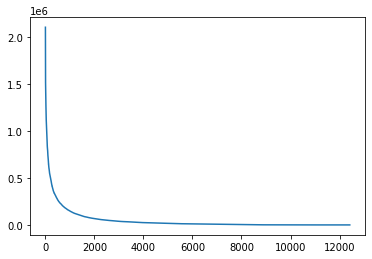

In [52]:
scounts = [y for x,y in wordtab]
pylab.plot(scounts)

What form does this curve have?
To make it clearer, lets to a log-log plot.

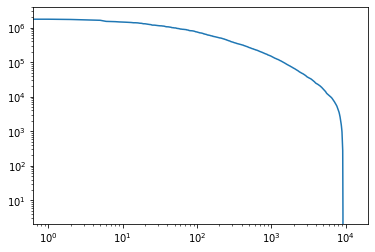

In [53]:
pylab.loglog(scounts)

> TODO: What is the approximate slope (in log-log space) of this curve over the frequency range 10^1 to 10^3 ?

It is linearly decreasing. Use the formula (y2-y1) / (x2-x1)

## Lab 2 Responses

The lab 2 responses should be entered here:
https://bcourses.berkeley.edu/courses/1377158/quizzes/2045090